In [2]:
import numpy
from PIL import Image
import io
import requests
import json
import time
import random

In [3]:
#Init the needed functions for images
def create_and_save_image(width = 64, height = 64 , name = 'random.png'):
    imarray = numpy.random.rand(width,height,3) * 255
    im = Image.fromarray(imarray.astype('uint8')).convert('RGBA')
    im.save(name)

def create_and_save_n_images(width=64 , height = 64, num = 100):
    for n in range(num):
        create_image(width, height, ('random'+str(n+1)+'.png'))
        
def create_bytearray(width=64,height=64):
    imarray = numpy.random.rand(width,height,3)*255
    casted = imarray.astype('uint8')
    return casted

def create_bytearray_with_color_prop(width = 64, height = 64, prop_red = 33, prop_green = 33, prop_blue = 33):
    #Initalize array with zeros
    imarray = numpy.random.rand(width, height, 3) * 0
    red_pixel = prop_red/100*width*height
    green_pixel = prop_green/100*width*height
    blue_pixel = prop_blue/100*width*height
    for x in range(height):
        for y in range(width):
            if(red_pixel > 0):
                imarray[x,y] = [255,0,0]
                red_pixel-= 1
            elif(green_pixel > 0):
                imarray[x,y] = [0,255,0]
                green_pixel-= 1
            elif(blue_pixel > 0):
                imarray[x,y] = [0,0,255]
                blue_pixel-= 1
            else:
                #Wrong proportion --> white pixel
                imarray[x,y] = [255,255,255]
    
    numpy.random.shuffle(imarray)
    for column in imarray:
        numpy.random.shuffle(column)
    casted = imarray.astype('uint8')
    return casted

def create_img_from_bytearray(bytearr, colorscheme='RGBA'):
    im=Image.fromarray(bytearr).convert(colorscheme)
    return im

def img_to_bytearray(Image):
    imgByteArr = io.BytesIO()
    Image.save(imgByteArr, format='PNG')
    imgByteArr = imgByteArr.getvalue()
    return imgByteArr

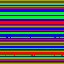

In [4]:
#check
img = create_img_from_bytearray(create_bytearray())
img
#img_to_bytearray(img)
img_prop = create_img_from_bytearray(create_bytearray_with_color_prop(64,64,33,34,33))
img_prop

In [5]:
#load trasi infos
url = 'https://phinau.de/trasi'
access_key = 'ehiefoveingereim3ooD2vo8reeb9ooz'
credentials = {'key': access_key}

In [6]:
def send_img_bytearray(nipples):
    file_to_upload = {'image': nipples}
    post_request = requests.post(url, files=file_to_upload, data=credentials)
    return post_request

In [7]:
#check
img = create_img_from_bytearray(create_bytearray_with_color_prop(64,64,33,34,33))
imgNipples = img_to_bytearray(img)
send_img_bytearray(imgNipples).status_code

200

In [8]:
def get_best_score(ResponseText):
    scores = json.loads(ResponseText)
    return scores[0].get('confidence')

def save_results(bestScore,imgBytes):
    #to be done, only mockup
    print(str(bestScore))

def full_loop():
    img_bytes = img_to_bytearray(create_img_from_bytearray(create_bytearray_with_color_prop(64,64,33,34,33)))
    response = send_img_bytearray(img_bytes)
    if(response.status_code==200):
        save_results(get_best_score(response.text),img_bytes)
    else:
        #throw errors? Show me something?
        print('upsie, got a ', response.status_code)

In [9]:
#check
full_loop()

0.68090391


In [10]:
def execute_timed_full_loops(MaxLoops,Intervall):
    i=0
    while(i < MaxLoops):
        full_loop()
        time.sleep(Intervall)
        i+=1;

In [ ]:
execute_timed_full_loops(100, 1.2)

0.00045467
0.00691228
0.40274623
0.38200197
0.4611215
0.1003754
0.07390981
0.03535941
0.16190699
0.13376345
0.45957956
0.2627309
upsie, got a  429
upsie, got a  429
0.03177555
0.15043446
0.14534669
0.02291779
0.05954062
0.15111887
0.16461003
0.00404368
0.02118179
0.09992865
0.01180088
0.02361382
0.11274069
0.30492097
0.95593458
0.01462378
0.0111654
0.4046028
0.83834934
0.14178061
0.14694647
0.09978047
0.46310541
0.00393375
0.1781057
0.03093681
0.00674851
0.01692746
0.01391323
upsie, got a  429
upsie, got a  429
upsie, got a  429
upsie, got a  429
upsie, got a  429
upsie, got a  429
upsie, got a  429
upsie, got a  429
upsie, got a  429
upsie, got a  429
upsie, got a  429
